In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [2]:
def read_file(filename):
    file = open(filename)
    lines = file.readlines()
    d1 = pd.DataFrame(np.zeros((150, 5)))
    for ind, line in enumerate(lines):
        line = line.split()
        d1[0][ind] = line[0]
        for i in line[1:]:
            d1[int(i[0])][ind] = i[2:]
    return d1

In [3]:
def dist_matrix(ftrd1,index):
    distarray = np.zeros((1,150))
    for ind,i in enumerate(ftrd1.values):
        distarray[0][ind] = np.sqrt(np.sum((ftrd1.values[index]-i)**2))
    return distarray

In [4]:
def dist_mean(ftrd1,mean):
    distarray = np.zeros((150,len(mean)))
    for mean_i,i in enumerate(mean):
        for ind, j in enumerate(ftrd1.values):
            distarray[ind][mean_i] = np.sqrt(np.sum((i-j)**2))
    return distarray

In [29]:
def initial_centroids(ftrd1,index,cluster):
    mean = list()
    mean.append(ftrd1.values[index])
    distmat = np.zeros((1,len(ftrd1)))
    for k in range(1,cluster):
        distmat += dist_matrix(ftrd1,index)
        index = list(distmat[0]).index(max(distmat[0]))
        mean.append(ftrd1.values[index])
    return mean

In [6]:
def get_mean(cluster_label,d1,ftrd1,cluster):
    mean = list()
    for i in range(0,cluster):
        features = len(ftrd1.columns)
        dframe = ftrd1[d1["Cluster"]==i]
        average = dframe.mean(axis=0)
        mean.append(np.array(average))
    return mean

In [7]:
def sse(ftrd1,cluster_mean):
    error = list()
    for mean in cluster_mean:
        for i in ftrd1.values:
            error.append(np.sum((mean - i) ** 2))
    return error

In [8]:
def k_means(ftrd1,index,clusters):
    cluster_mean = initial_centroids(ftrd1,index,clusters)
    cluster_old = list()
    for it in range(0,100):
        cluster_new = list()
        mean_dist = dist_mean(ftrd1,cluster_mean)
        for mindist in mean_dist:
            minimum = min(mindist)
            if Counter(mindist)[minimum] > 1:
                rand = [r for r, x in enumerate(mindist) if x == minimum]
                cluster_new.append(random.choice(rand))
            else:
                cluster_new.append(list(mindist).index(minimum))
        d1["Cluster"] = cluster_new
        cluster_mean = get_mean(cluster_new,d1,ftrd1,clusters)
        if cluster_new == cluster_old:
            print("Clustered, Iteration: ",it)
            return cluster_mean
        else:
            cluster_old = cluster_new
    return cluster_mean,np.sum(dist_mean(ftrd1,cluster_mean))

In [9]:
def get_clusters(ftrd1,d1,clusters):
    final_clusters = dict()
    for i in range(0,clusters):
        final_clusters[i] = ftrd1[d1.Cluster == i]
    return final_clusters

In [10]:
filename = "IRIS.txt"
d1 = read_file(filename)
ftrd1 = d1.drop(columns=0)
index = np.random.randint(0,len(d1)-1)

In [30]:
start = time.time()
clusters = np.arange(1,10)
variance = list()
for k in clusters:
    var = 0
    print("k: ",k)
    clustermean = k_means(ftrd1,index,k)
    final_clusters = get_clusters(ftrd1,d1,k)
    error = 0
    for i in final_clusters:
        for j in final_clusters[i].values:
            error += np.sum(pow((clustermean[i] - j) ,2))
    variance.append(error)
end = time.time()


k:  1
Clustered, Iteration:  1
k:  2
Clustered, Iteration:  2
k:  3
Clustered, Iteration:  5
k:  4
Clustered, Iteration:  5
k:  5
Clustered, Iteration:  7
k:  6
Clustered, Iteration:  9
k:  7
Clustered, Iteration:  18
k:  8
Clustered, Iteration:  7
k:  9
Clustered, Iteration:  8


In [31]:
end - start

5.986061334609985

In [24]:
print(end - start)

4.039717674255371


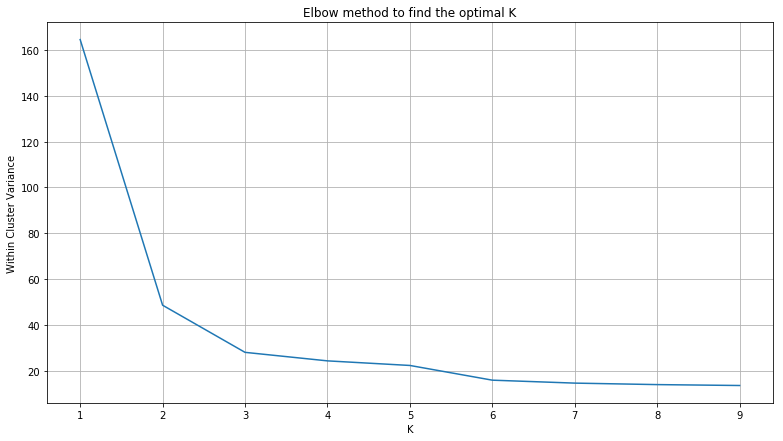

In [25]:
plt.figure(figsize=(13,7))
plt.plot(clusters,variance)
plt.title("Elbow method to find the optimal K")
plt.xlabel("K")
plt.ylabel("Within Cluster Variance")
plt.grid()
plt.show()

In [277]:
filename = "IRIS.txt"
d1 = read_file(filename)
ftrd1 = d1.drop(columns=0)
index = np.random.randint(0,len(d1)-1)

150


In [282]:
clusters = np.arange(3,4)
variance = list()
for k in clusters:
    var = 0
    print("k: ",k)
    clustermean = k_means(ftrd1,index,k)
    final_clusters = get_clusters(ftrd1,d1,k)
    error = 0
    for i in final_clusters:
        for j in final_clusters[i].values:
            for x,k in enumerate(j):
                error += pow((clustermean[i][x] - k),2)
    variance.append(error)
clustermean

k:  3
Clustered, Iteration:  11


[array([-0.17592596, -0.44618056,  0.11793781,  0.04166668]),
 array([ 0.33546999, -0.11378209,  0.5143415 ,  0.56410263]),
 array([-0.60777778,  0.18166667, -0.84271174, -0.88000014])]

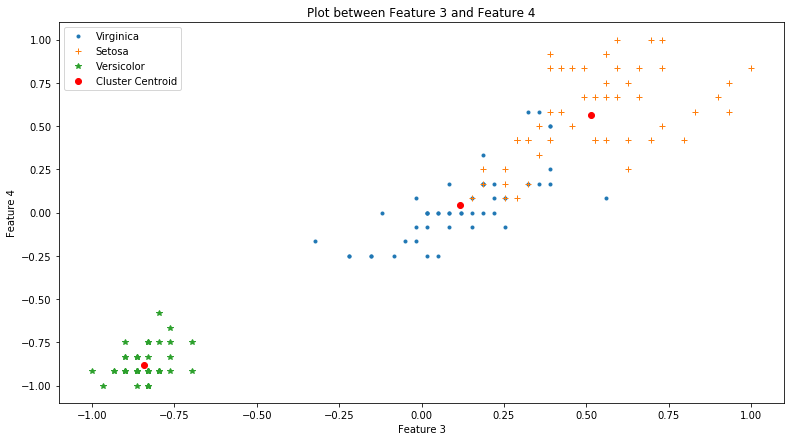

In [283]:
plt.figure(figsize=(13,7))
plt.plot(final_clusters[0][3],final_clusters[0][4],'.',label = "Virginica")
plt.plot(final_clusters[1][3],final_clusters[1][4],'+',label = "Setosa")
plt.plot(final_clusters[2][3],final_clusters[2][4],'*',label = "Versicolor")
plt.plot(clustermean[0][2],clustermean[0][3],'ro')
plt.plot(clustermean[2][2],clustermean[2][3],'ro')
plt.plot(clustermean[1][2],clustermean[1][3],'ro',label = "Cluster Centroid")
plt.legend()
plt.title("Plot between Feature 3 and Feature 4")
plt.xlabel("Feature 3")
plt.ylabel("Feature 4")
plt.show()

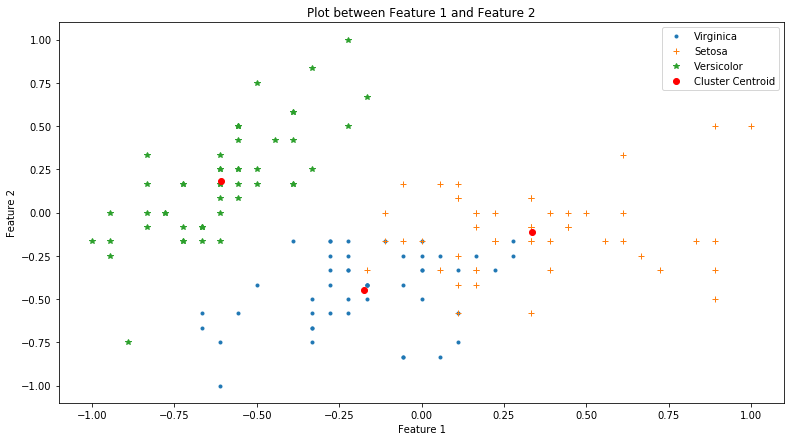

In [284]:
plt.figure(figsize=(13,7))
plt.plot(final_clusters[0][1],final_clusters[0][2],'.',label = "Virginica")
plt.plot(final_clusters[1][1],final_clusters[1][2],'+',label = "Setosa")
plt.plot(final_clusters[2][1],final_clusters[2][2],'*',label = "Versicolor")
plt.plot(clustermean[0][0],clustermean[0][1],'ro')
plt.plot(clustermean[2][0],clustermean[2][1],'ro')
plt.plot(clustermean[1][0],clustermean[1][1],'ro',label = "Cluster Centroid")
plt.legend()
plt.title("Plot between Feature 1 and Feature 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()